In [2]:
import pandapower as pp
import pandapower.networks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [506]:
# Initialize IEEE test network
net_39 = pandapower.networks.case39()
net_39

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - polynomial_cost (10 elements)
   - gen (9 elements)
   - line (34 elements)
   - trafo (12 elements)
   - bus_geodata (39 elements)
   - ext_grid (1 element)
 and the following results tables:
   - res_line (34 elements)
   - res_trafo (12 elements)
   - res_bus (39 elements)
   - res_gen (9 elements)
   - res_ext_grid (1 element)
   - res_load (21 elements)

In [507]:
def rename(network):
    line_name = []
    bus_name = []
    for i in (network.line.index.values+1):
        line_name.append('line_'+str(i))
    
    for j in network.bus.name.values:
        bus_name.append('bus_'+str(j))
    
    # Rename lines: i.e. 'line_1'
    network.line.name=line_name
    
    # Rename bus: i.e. 'bus_1'
    network.bus.name=bus_name
    pass

In [508]:
rename(net_39)
net_39.line.head()

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,max_i_ka,df,parallel,type,in_service
0,line_1,None,0,1,1.0,4.165875,48.919275,1557.117675,1.004087,1.0,1,ol,True
1,line_2,None,0,38,1.0,1.190250,29.756250,1671.444477,1.673479,1.0,1,ol,True
2,line_3,None,1,2,1.0,1.547325,17.972775,573.194026,0.836740,1.0,1,ol,True
3,line_4,None,1,24,1.0,8.331750,10.236150,325.374525,0.836740,1.0,1,ol,True
4,line_5,None,2,3,1.0,1.547325,25.352325,493.410410,0.836740,1.0,1,ol,True


In [269]:
net_39.gen

,bus,controllable,in_service,max_p_kw,max_q_kvar,min_p_kw,min_q_kvar,name,p_kw,scaling,sn_kva,type,vm_pu
0,29,True,True,-0.0,400000.0,-1040000.0,140000.0,None,-250000.0,1.0,NaN,None,1.0499
1,31,True,True,-0.0,300000.0,-725000.0,150000.0,None,-650000.0,1.0,NaN,None,0.9841
2,32,True,True,-0.0,250000.0,-652000.0,0.0,None,-632000.0,1.0,NaN,None,0.9972
3,33,True,True,-0.0,167000.0,-508000.0,0.0,None,-508000.0,1.0,NaN,None,1.0123
4,34,True,True,-0.0,300000.0,-687000.0,-100000.0,None,-650000.0,1.0,NaN,None,1.0494
5,35,True,True,-0.0,240000.0,-580000.0,0.0,None,-560000.0,1.0,NaN,None,1.0636
6,36,True,True,-0.0,250000.0,-564000.0,0.0,None,-540000.0,1.0,NaN,None,1.0275
7,37,True,True,-0.0,300000.0,-865000.0,-150000.0,None,-830000.0,1.0,NaN,None,1.0265
8,38,True,True,-0.0,300000.0,-1100000.0,-100000.0,None,-1000000.0,1.0,NaN,None,1.0300


In [270]:
net_39.bus.head()

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.06,0.94,bus_1,b,345.0,2
1,True,1.06,0.94,bus_2,b,345.0,2
2,True,1.06,0.94,bus_3,b,345.0,2
3,True,1.06,0.94,bus_4,b,345.0,1
4,True,1.06,0.94,bus_5,b,345.0,1


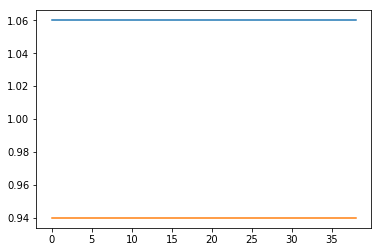

In [271]:
plt.plot(net_39.bus.max_vm_pu)
plt.plot(net_39.bus.min_vm_pu)

In [299]:
pp.runpp(net_39)
net_39

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - polynomial_cost (10 elements)
   - gen (9 elements)
   - line (34 elements)
   - trafo (12 elements)
   - bus_geodata (39 elements)
   - ext_grid (1 element)
 and the following results tables:
   - res_line (34 elements)
   - res_trafo (12 elements)
   - res_bus (39 elements)
   - res_gen (9 elements)
   - res_ext_grid (1 element)
   - res_load (21 elements)

In [300]:
net_39.res_bus.head()

,vm_pu,va_degree,p_kw,q_kvar
0,1.039384,-13.536602,97600.0,44200.0
1,1.048494,-9.785267,0.0,0.0
2,1.030708,-12.276384,322000.0,2400.0
3,1.004460,-12.626734,500000.0,184000.0
4,1.006006,-11.192339,0.0,0.0


In [301]:
net_39.res_line.head()

,p_from_kw,q_from_kvar,p_to_kw,q_to_kvar,pl_kw,ql_kvar,i_from_ka,i_to_ka,i_ka,loading_percent
0,-173699.968353,-40307.333418,174677.679494,-24357.905613,977.711141,-64665.239032,0.287100,0.281497,0.287100,28.593122
1,76099.968353,-3892.666582,-76033.949144,-74752.541524,66.019208,-78645.208106,0.122686,0.173239,0.173239,10.352039
2,319914.587166,88586.563724,-318579.541911,-100878.939507,1335.045255,-12292.375784,0.529823,0.542565,0.542565,64.842795
3,-244592.266659,82973.576320,248928.896793,-93837.355150,4336.630133,-10863.778830,0.412240,0.420913,0.420913,50.303984
4,37339.617644,113064.517040,-37131.889918,-132590.249252,207.727726,-19525.732212,0.193326,0.229401,0.229401,27.416027


## Changing loads

In [509]:
samples_per_second = 60
loads_1 = np.random.normal(loc=400000, scale=100000, size=samples_per_second)
loads_2 = np.random.normal(loc=100000, scale=400000, size=samples_per_second)

pmu_0_va_degree = []
pmu_1_va_degree = []
pmu_2_va_degree = []

print('PMU location: ', pmu_location)

# For a PMU with 60 sps
for t, l1, l2 in zip(range(samples_per_second), loads_1, loads_2):
    net_39.load.p_kw[0] = l1
    net_39.load.p_kw[1] = l2
    pp.runpp(net_39)
    pmu_0_va_degree.append(net_39.res_bus.loc[pmu_location[0]].va_degree)
    pmu_1_va_degree.append(net_39.res_bus.loc[pmu_location[1]].va_degree)
    pmu_2_va_degree.append(net_39.res_bus.loc[pmu_location[2]].va_degree)

PMU location:  [22, 25, 28]


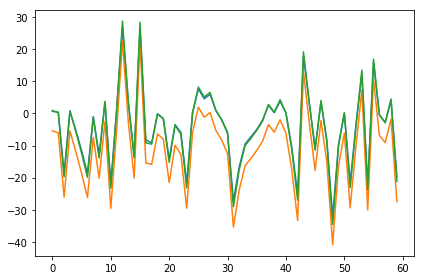

In [510]:
plt.plot(pmu_0_va_degree)
plt.plot(pmu_1_va_degree)
plt.plot(pmu_2_va_degree)
plt.tight_layout()

In [511]:
# Setting a line to in service or not
line_number = 3
net_39.line.in_service.loc[line_number-1] = False
net_39.line.loc[line_number-1]

name             line_3
std_type           None
from_bus              1
to_bus                2
length_km             1
r_ohm_per_km    1.54732
x_ohm_per_km    17.9728
c_nf_per_km     573.194
max_i_ka        0.83674
df                    1
parallel              1
type                 ol
in_service        False
Name: 2, dtype: object

In [512]:
# For a PMU with 60 sps
for t, l1, l2 in zip(range(samples_per_second), loads_1, loads_2):
    net_39.load.p_kw[0] = l1
    net_39.load.p_kw[1] = l2
    pp.runpp(net_39)
    pmu_0_va_degree.append(net_39.res_bus.loc[pmu_location[0]].va_degree)
    pmu_1_va_degree.append(net_39.res_bus.loc[pmu_location[1]].va_degree)
    pmu_2_va_degree.append(net_39.res_bus.loc[pmu_location[2]].va_degree)

In [513]:
net_39.res_line.loc[2]

p_from_kw          0.0
q_from_kvar        0.0
p_to_kw            0.0
q_to_kvar          0.0
pl_kw              0.0
ql_kvar            0.0
i_from_ka          0.0
i_to_ka            0.0
i_ka               0.0
loading_percent    0.0
Name: 2, dtype: float64

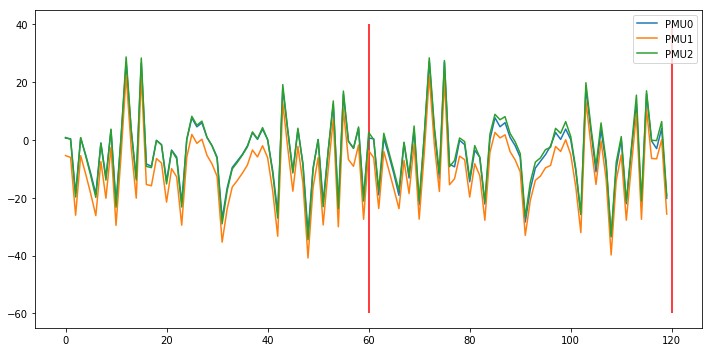

In [514]:
plt.figure(figsize=[10,5])
plt.plot(pmu_0_va_degree)
plt.plot(pmu_1_va_degree)
plt.plot(pmu_2_va_degree)
plt.vlines(x=60,ymin=-60, ymax=40,colors='r')
plt.vlines(x=120,ymin=-60, ymax=40,colors='r')
plt.legend(['PMU0', 'PMU1', 'PMU2'])
plt.tight_layout()

## Obtain PMU data

Three PMUs: Bus 23, 26, 29 (for example) <br>
Quantity: Voltage angle

In [237]:
pmu_location = [i-1 for i in [23, 26, 29]] # To conform with data format in the case, 0-start

In [515]:
fft_pmu0 = np.fft.fft(pmu_0_va_degree)
fft_pmu1 = np.fft.fft(np.asarray(pmu_1_va_degree)-np.asarray(pmu_0_va_degree))
fft_pmu2 = np.fft.fft(np.asarray(pmu_2_va_degree)-np.asarray(pmu_0_va_degree))


imag_pmu0 = fft_pmu0.imag.tolist()
imag_pmu1 = fft_pmu1.imag.tolist()
imag_pmu2 = fft_pmu2.imag.tolist()

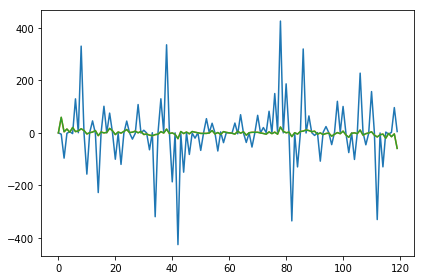

In [516]:
plt.plot(imag_pmu0)
plt.plot(imag_pmu1)
plt.plot(imag_pmu2)
plt.tight_layout()